<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Aug 23 14:56:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.86                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080      WDDM  |   00000000:01:00.0  On |                  N/A |
| 53%   29C    P8             54W /  370W |    7596MiB /  10240MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import requests
from pathlib import Path
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd
import torch
from torch import nn
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn
from torchmetrics import Accuracy, ConfusionMatrix
import mlxtend
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from timeit import default_timer as timer
from tqdm.auto import tqdm
from mlxtend.plotting import plot_confusion_matrix
import random
from pathlib import Path
import torchvision
# from torchvision import datasets, transforms


c:\Users\Tiger\anaconda3\envs\py311Udemy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print (device)

2.3.0
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Image recognition
2. Self Driving
3. Medical imaging

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

fits training data well, but not genaralizable

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. dropout
2. stop training when test results are worse than training
3. introduce noixe

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

classifies graph as lady bug

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

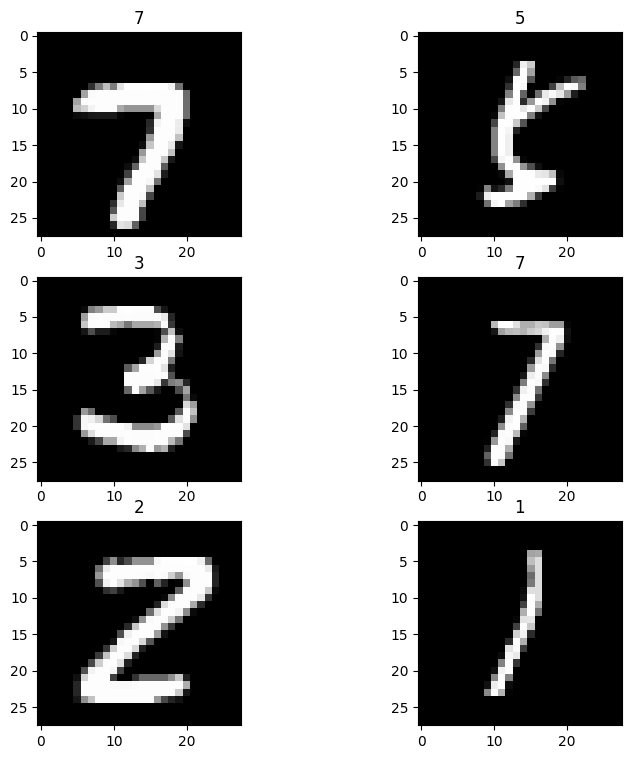

In [5]:
train_data_size = len (train_data)
fig = plt.figure (figsize=(9,9))
image_count_range = range (1, 7)
rows, cols = 3, 2
for i in  image_count_range:
    img_idx = random.randint(0, train_data_size)
    image, label = train_data[img_idx]
    fig.add_subplot (rows, cols, i)
    plt.imshow (image.squeeze(), cmap = 'grey')
    plt.title (label)




In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                            batch_size = BATCH_SIZE,
                            shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            shuffle = False
                            )

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [10]:
# write test code to compute size of 
torch.manual_seed(42)
img, img_class = train_data[0]
print (f'image shape {img.shape}')
conv_layer = nn.Conv2d(in_channels = 1, 
                out_channels = 10,
                kernel_size = 3,
                padding = 0)
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
flatten_model = nn.Flatten()
lazy_dense = nn.LazyLinear(out_features=10)
# linear_model = nn.Linear(in_features=13*13,
#                         out_features = 10)

unsqueeze_img = img.unsqueeze (dim = 0)
conv_out = conv_layer(unsqueeze_img)
# print( conv_out.view(1, -1).size(1))
maxp_out = max_pool_layer(conv_out)
# print( maxp_out.view(1, -1).size(1))
flat_out = flatten_model(maxp_out)
# linear_out = linear_model(flat_out)
# flat_out.shape, maxp_out.shape, linear_out.shape
final_out = lazy_dense(flat_out)
flat_out.shape[0]*flat_out.shape[1]
# final_out.shape, flat_out.shape, maxp_out.shape, linear_out.shape
print (f'lazy out {final_out.shape}\nimage shape {img.shape}\nmax_pool shape {maxp_out.shape},\nflatten_out {flat_out.shape}')

image shape torch.Size([1, 28, 28])
lazy out torch.Size([1, 10])
image shape torch.Size([1, 28, 28])
max_pool shape torch.Size([1, 10, 13, 13]),
flatten_out torch.Size([1, 1690])


In [11]:
import torch
import torch.nn as nn

# Define the network architecture
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.conv_layer = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, padding=0)
        self.max_pool_layer = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.linear_layer = nn.Linear(in_features=10*13*13, out_features=10)
        self.lazy_layer = nn.LazyLinear(out_features=10)
    
    def forward(self, x):
        x = self.conv_layer(x)
        x = self.max_pool_layer(x)
        x = self.flatten(x)
        # x = self.linear_layer(x)
        x = self.lazy_layer(x)
        return x

# Create a dummy input tensor with appropriate dimensions (1 channel, 14x14)
dummy_input = torch.randn(1, 1, 14, 14)
# print (f'input_shape {dummy_input.shape}')
# Instantiate the model and get the output
model = CustomModel()
# output = model(dummy_input)
unsq_img = img.unsqueeze(dim=0)
print (f'unqueeze img {unsq_img.shape}')
output = model(unsq_img)
print(output.shape)  # should be torch.Size([1, 10])


unqueeze img torch.Size([1, 1, 28, 28])
torch.Size([1, 10])


In [12]:
class HassanCNN(nn.Module):
    def __init__ (self,input_shape, hidden_units, output_shape,
            in_conv_k_size:int = 3,
            in_stride:int = 1,
            in_pad:int = 1,
            in_maxp_k_size = 2,
            in_maxp_stride = 2,
            in_batch_size = 32):
        super().__init__()
        self.conv1 = nn.Conv2d(
                            in_channels = input_shape,
                            out_channels = hidden_units,
                            kernel_size=in_conv_k_size,
                            stride = in_stride,
                            padding = in_pad)
        self.conv2 = nn.Conv2d(
                            in_channels = hidden_units,
                            out_channels = hidden_units,
                            kernel_size=in_conv_k_size,
                            stride = in_stride,
                            padding = in_pad)
        self.relu = nn.ReLU()

        self.maxpool = nn.MaxPool2d(kernel_size=in_maxp_k_size,
                                    stride = in_maxp_stride)
        self.flatten = nn.Flatten()
        # self.linear = nn.Linear()
        self.lazydense = nn.LazyLinear(out_features = output_shape)

    def forward (self, x):
        # first block
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        

        # second block
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)

        # flatten
        # linear_output = x.size(1) * x.size(2) * hidden_units
        x = self.flatten(x)
        # flattened_size = x.view(in_batch_size, -1).size(1)
        # flattened_features = hidden_units * flattened_size
        # flattened_feature = x.shape[0] * x.shape[1]
        x = self.lazydense (x)
        return x

torch.manual_seed(42)
model_has1 = HassanCNN(input_shape = 1,
                       hidden_units = 10,
                       output_shape = 10).to(device)

model_has1

HassanCNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lazydense): LazyLinear(in_features=0, out_features=10, bias=True)
)

In [31]:
X, y = train_data[0]
X = X.to(device)
pred = model_has1(X.unsqueeze(dim =0))
pred

tensor([[ 5.2166, -0.0155,  3.7962, -1.1792, -1.5455,  1.7508, -0.0110, -7.2376,
          6.0249, -4.4973]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [14]:
# set up loss
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_has1.parameters(), lr = 0.1)

In [15]:
# timer
def print_train_time (start:float,
                      end:float,
                      device:torch.device = None):
    total_time = end - start
    print (f'Train time ondevice {device}: {total_time:.3f} seconds')
    return total_time


In [16]:
def train_loop (model: nn.Module,
                dataloader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                optimizer:torch.optim.Optimizer,
                accuracy_fn,
                device:torch.device = device):
    train_loss = 0
    train_acc = 0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_train_pred = model (X)
        loss = loss_fn (y_train_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true = y,
                                 y_pred = y_train_pred.argmax(dim = 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print (f'Train Loss {train_loss:.4f}| train acc {train_acc:.2f} ')

def test_loop (model: nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):
    
    test_loss = 0
    test_acc = 0
    model.eval()
    for batch, (X, y) in enumerate (dataloader):
        X, y = X.to(device), y.to(device)
        y_test_pred = model(X)
        test_loss += loss_fn(y_test_pred, y)
        test_acc += accuracy_fn(y_true = y, 
                                y_pred = y_test_pred.argmax(dim = 1))
        
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print (f'Test Loss: {test_loss:.4f}| Test ACC {test_acc:.2f}')


In [17]:
torch.manual_seed(42)
train_time_start_on_has_model1 = timer()
epochs = 5
range_epochs = range (epochs)
for epoch in tqdm (range_epochs):
    print (f'Epoch {epoch}\n')
    train_loop(model= model_has1,
           dataloader = train_dataloader,
           loss_fn = loss_fn,
           optimizer = optimizer,
           accuracy_fn =accuracy_fn)
    
    test_loop(model= model_has1,
              dataloader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn)
    

train_time_end_on_has_model1 = timer()

total_time_has_model1 =print_train_time(start = train_time_start_on_has_model1,
                                        end=train_time_end_on_has_model1,
                                        device = device)




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0

Train Loss 0.2213| train acc 93.22 


 20%|██        | 1/5 [00:11<00:46, 11.69s/it]

Test Loss: 0.0795| Test ACC 97.44
Epoch 1

Train Loss 0.0835| train acc 97.45 


 40%|████      | 2/5 [00:23<00:35, 11.91s/it]

Test Loss: 0.0648| Test ACC 97.87
Epoch 2

Train Loss 0.0681| train acc 97.84 


 60%|██████    | 3/5 [00:37<00:25, 12.57s/it]

Test Loss: 0.0591| Test ACC 98.10
Epoch 3

Train Loss 0.0611| train acc 98.12 


 80%|████████  | 4/5 [00:49<00:12, 12.65s/it]

Test Loss: 0.0588| Test ACC 98.05
Epoch 4

Train Loss 0.0561| train acc 98.28 


100%|██████████| 5/5 [01:02<00:00, 12.45s/it]

Test Loss: 0.0463| Test ACC 98.53
Train time ondevice cuda: 62.246 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

##  Evaluate Model

In [18]:
# write code to valuate model
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn):
    
    loss, acc = 0,0
    model.eval()

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to (device), y.to(device)
            y_pred = model (X)
            
            loss += loss_fn (y_pred, y)
            acc += accuracy_fn(y_true = y, 
                               y_pred = y_pred.argmax(dim =1))
            
        loss /= len(dataloader)
        acc /= len(dataloader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


In [19]:
model_has1_results = eval_model (model =model_has1,
                                 dataloader=test_dataloader,
                                  loss_fn = loss_fn,
                                   accuracy_fn=accuracy_fn )

model_has1_results

{'model_name': 'HassanCNN',
 'model_loss': 0.04631149023771286,
 'model_acc': 98.53234824281151}

## Show results

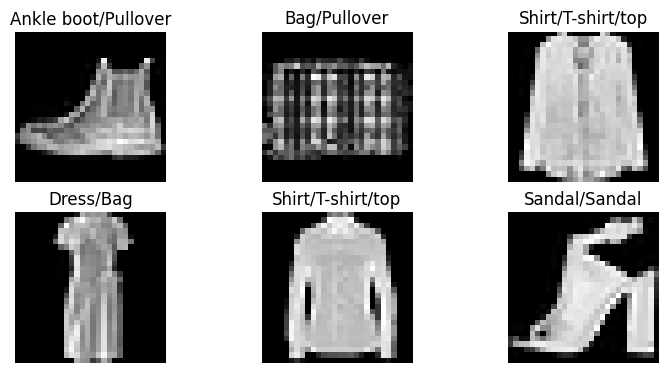

In [35]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
class_names = train_data.classes
model_has1.eval()
row, cols = 2, 3
range_pics = range (1,row * cols + 1)
with torch.inference_mode():
    for i in range_pics:
        rand_idx = torch.randint(0, len (test_data), size =[1]).item()
        img, label = test_data[rand_idx]
        unsqz_img = torch.unsqueeze(img, dim = 0).to(device)
        pred_label = model_has1(unsqz_img).argmax(dim = 1)
        fig.add_subplot(rows, cols, i)
        plt.imshow(img.squeeze(), cmap = 'gray')
        plt.title (class_names[label] + '/' + class_names[pred_label])
        plt.axis(False)


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [21]:
# create predictions
y_preds = []
model_has1.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = 'Making predictions'):
        X, y = X.to (device), y.to(device)
        y_logit = model_has1(X)
        y_pred = torch.softmax(y_logit, dim = 1).argmax(dim = 1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)


Making predictions: 100%|██████████| 313/313 [00:01<00:00, 242.79it/s]


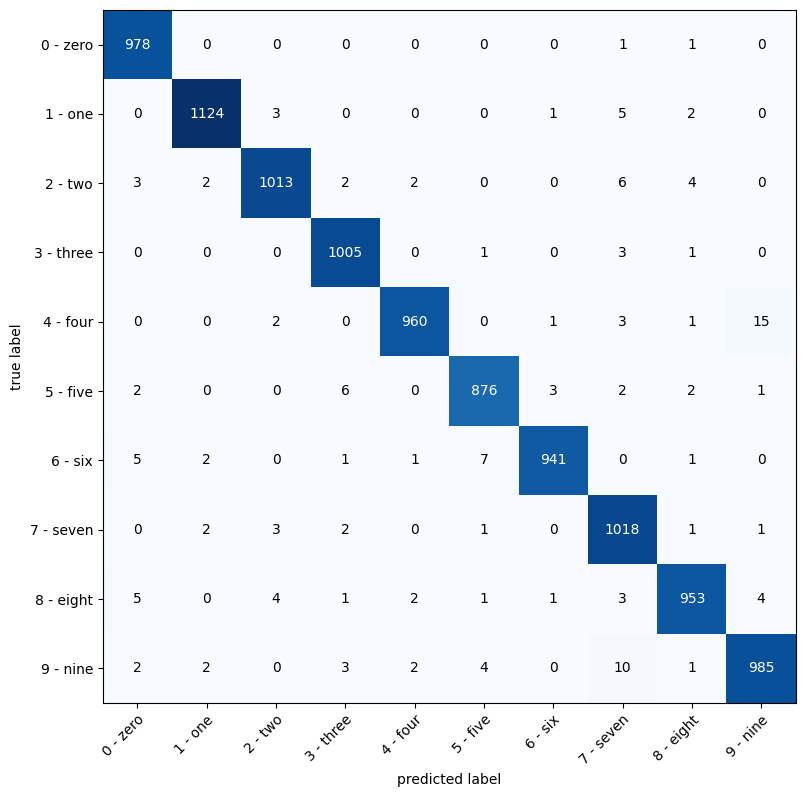

In [22]:
confmat = ConfusionMatrix(num_classes=len(class_names), task = 'multiclass')
confmat_tensor = confmat (preds=y_pred_tensor,
                          target = test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize =  (12, 9)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [23]:
tst_imgs = torch.randn(size = (1, 3, 64, 64))
tst_img = tst_imgs[0]
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels=10,
                       kernel_size=4,
                       stride = 3,
                       padding = 3)
conv_output = conv_layer (tst_img.unsqueeze(0))
conv_output.shape


torch.Size([1, 10, 23, 23])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [24]:
# load data
train_data = datasets.FashionMNIST(
    root = 'data',
    train= True,
    download = True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
    )

test_data = datasets.FashionMNIST(
            root = 'data',
            train = False,
            download = True,
            transform = torchvision.transforms.ToTensor(),
            target_transform = None
            )

In [25]:
torch.manual_seed (42)


model_has2 = HassanCNN(input_shape = 1,
                    hidden_units = 10,
                    output_shape = 10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_has2.parameters(), lr = 0.1)
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                            batch_size = BATCH_SIZE,
                            shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            shuffle = False
                            )

c:\Users\Tiger\anaconda3\envs\py311Udemy\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [26]:
# train the system
torch.manual_seed(42)
train_time_start_on_has2 = timer()
epochrange = range(5)
for epoch in tqdm (epochrange):
    print (f'Epoch {epoch}\n')
    train_loop (model = model_has2,
                dataloader=train_dataloader,
                loss_fn = loss_fn,
                optimizer=optimizer,
                accuracy_fn = accuracy_fn)
    
    test_loop (model = model_has2,      
               dataloader= test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn)
train_time_end_on_has2 = timer()   
train_time_end_on_has2_model = print_train_time(start = train_time_start_on_has2,
                                                end = train_time_end_on_has2,
                                                device = device) 


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0

Train Loss 0.5621| train acc 80.11 


 20%|██        | 1/5 [00:13<00:52, 13.10s/it]

Test Loss: 0.3994| Test ACC 86.10
Epoch 1

Train Loss 0.3705| train acc 86.69 


 40%|████      | 2/5 [00:25<00:38, 12.81s/it]

Test Loss: 0.3523| Test ACC 87.46
Epoch 2

Train Loss 0.3334| train acc 88.04 


 60%|██████    | 3/5 [00:38<00:25, 12.59s/it]

Test Loss: 0.3465| Test ACC 87.87
Epoch 3

Train Loss 0.3145| train acc 88.67 


 80%|████████  | 4/5 [00:50<00:12, 12.48s/it]

Test Loss: 0.3262| Test ACC 88.38
Epoch 4

Train Loss 0.3013| train acc 89.11 


100%|██████████| 5/5 [01:02<00:00, 12.54s/it]

Test Loss: 0.3199| Test ACC 88.81
Train time ondevice cuda: 62.709 seconds


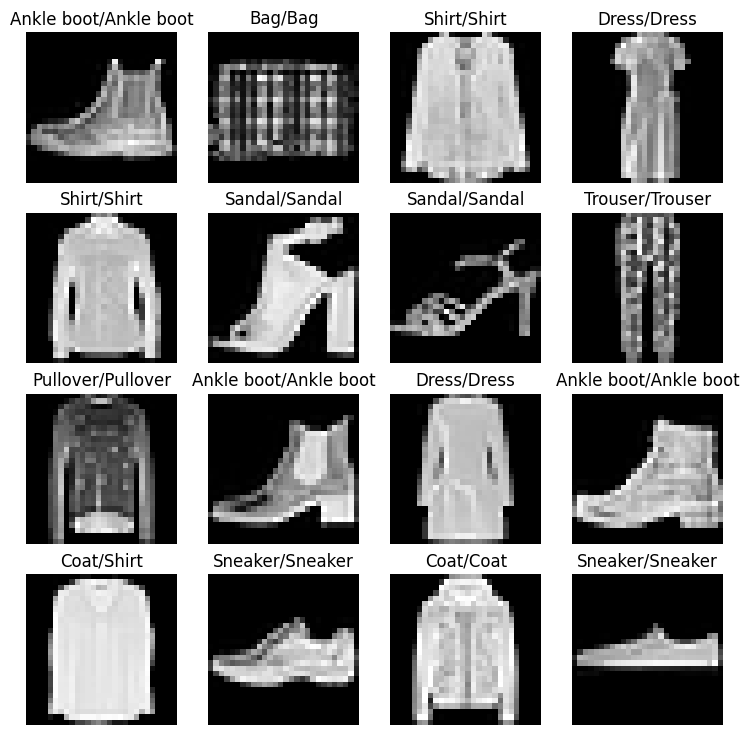

In [27]:
# visualize
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
class_names = train_data.classes
model_has2.eval()
rows, cols = 4, 4
plt_range  = range (1, rows * cols + 1)
with torch.inference_mode():
    for i in plt_range:
        random_idx = torch.randint(0, len(test_data), size =[1]).item()
        img, label = test_data[random_idx]
        unsq_img = torch.unsqueeze(img, dim = 0).to(device)
        pred_label = model_has2(unsq_img).argmax(dim = 1)
        fig.add_subplot(rows, cols, i)
        plt.imshow(img.squeeze(), cmap='grey')
        plt.title(class_names[label] + '/' +class_names[pred_label])
        plt.axis (False)


In [28]:
y_preds = []
model_has2.eval()
with torch.inference_mode():
    for X, y in tqdm (test_dataloader, desc = 'Dress Predictions'):
        X, y = X.to(device), y.to(device)
        y_logit = model_has2(X)
        y_pred = torch.softmax(y_logit, dim = 1).argmax(dim = 1)
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Dress Predictions: 100%|██████████| 313/313 [00:01<00:00, 231.29it/s]


In [29]:
test_data.targets.shape
y_pred_tensor.shape

torch.Size([10000])

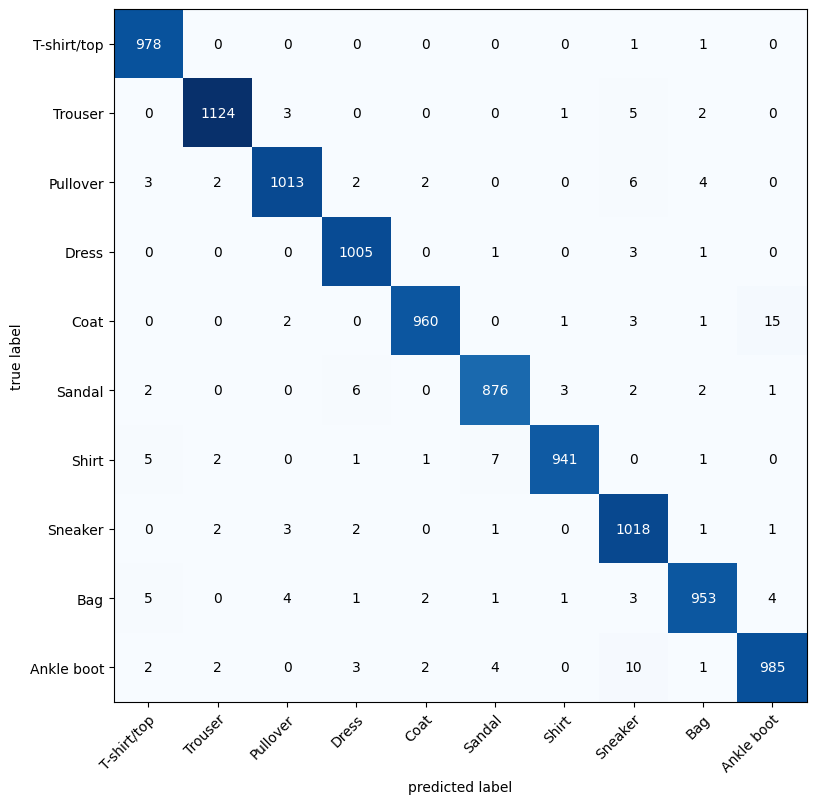

In [30]:
confmat = ConfusionMatrix(num_classes= len(class_names), task = 'multiclass')
confat_tensor = confmat(preds = y_pred_tensor,
                        target = test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (12, 9)
)